In [ ]:
#Impor Library yang Diperlukan
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

In [ ]:
# Impor Data dan Loading Data
df = pd.read_excel('/content/europe brent spot price.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
print(df.head)

<bound method NDFrame.head of             Europe Brent Spot Price FOB (Dollars per Barrel)
Date                                                        
1987-05-20                                             18.63
1987-05-21                                             18.45
1987-05-22                                             18.55
1987-05-25                                             18.60
1987-05-26                                             18.63
...                                                      ...
2024-11-06                                             76.52
2024-11-07                                             75.73
2024-11-08                                             74.04
2024-11-11                                             72.19
2024-11-12                                             72.56

[9513 rows x 1 columns]>


In [ ]:
df.isnull().sum() # Mengecek nilai null pada data

,0
Europe Brent Spot Price FOB (Dollars per Barrel),0


In [ ]:
# Konversi Dataframe ke dalam bentuj Array
dataset = df.values

#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Membagi Dataset
train_ratio = 0.8
training_data_len = int(np.round(train_ratio * len(dataset)))

In [ ]:
#Mmebuat Ukuran Titik Data (sequences of data points)
lookback = 100
x_train, y_train = [], []

for i in range(lookback, len(scaled_data)):
    x_train.append(scaled_data[i-lookback:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Membangun model LSTM
model = Sequential()

# Layer 1: LSTM pertama dengan return_sequences=True
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Layer 2: LSTM kedua dengan return_sequences=True
model.add(LSTM(100, return_sequences=True))

# Layer 3: LSTM ketiga (return_sequences=False untuk hasilkan output akhir)
model.add(LSTM(100, return_sequences=False))

# Dense layer untuk output
model.add(Dense(100, activation='relu'))  # Dense layer opsional dengan 100 unit
model.add(Dense(1))  # Output layer dengan 1 unit (misalnya regresi atau nilai prediksi)

# Melihat ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211,801 (827.35 KB)

 Trainable params: 211,801 (827.35 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Kompilasi dan lakukan pelatihan model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_split =0.2)

Epoch 1/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 88s 178ms/step - loss: 0.0046 - val_loss: 9.5018e-04
Epoch 2/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 141s 177ms/step - loss: 5.5263e-04 - val_loss: 6.1038e-04
Epoch 3/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 141s 175ms/step - loss: 3.3696e-04 - val_loss: 5.8674e-04
Epoch 4/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 84s 178ms/step - loss: 2.8298e-04 - val_loss: 4.3011e-04
Epoch 5/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 142s 177ms/step - loss: 2.4574e-04 - val_loss: 2.9939e-04
Epoch 6/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 83s 175ms/step - loss: 1.5828e-04 - val_loss: 3.0825e-04
Epoch 7/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - loss: 1.3567e-04 - val_loss: 2.2113e-04
Epoch 8/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 142s 175ms/step - loss: 1.5662e-04 - val_loss: 3.3781e-04
Epoch 9/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 143s 176ms/step - loss: 9.4977e-05 - val_loss: 1.8298e-04
Epoch 10/10
471/471 ━━━━━━━━━━━━━━━━━━━━ 143s 179ms/step - loss: 1.0559e-04 - val_loss: 3.5724e-04


In [ ]:
# Mempersiapkan data uji (testing data)
test_data = scaled_data[training_data_len - lookback:, :]

# Membuat dataset x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(lookback, len(test_data)):
    x_test.append(test_data[i-lookback:i, 0])

# Konversi data test menjadi numpy array
x_test = np.array(x_test)
# Mengubah bentuk data test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Meakukan prediksi dan evaluasi model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, -1]

# Evaluasi model
# Menghitung RMSE, MAE, MAPE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
mae = np.mean(np.abs(predictions - y_test))
mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100

print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step
RMSE: 27.28252015533489
MAE: 21.26525779421744
MAPE: 35.919609120477645


<ipython-input-16-ae20ba1d99dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


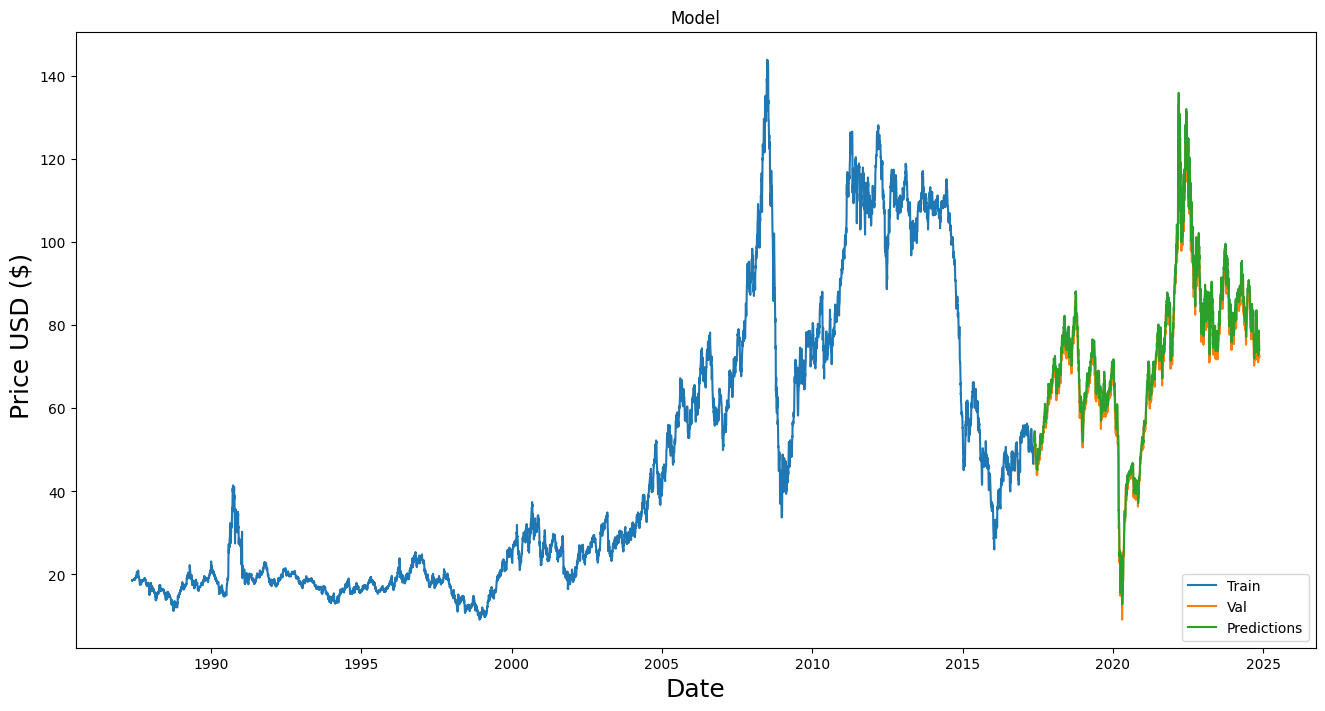

In [ ]:
# Membuat Plot Data Train dan Valid
train = df[ : training_data_len]
valid = df[training_data_len: ]
valid['Predictions'] = predictions
# Visualisasi Data Train dan Valid
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' Price USD ($)', fontsize=18)
plt.plot(train. index, train['Europe Brent Spot Price FOB (Dollars per Barrel)'])
plt.plot(valid.index, valid[['Europe Brent Spot Price FOB (Dollars per Barrel)', 'Predictions' ]])
plt. legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt. show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


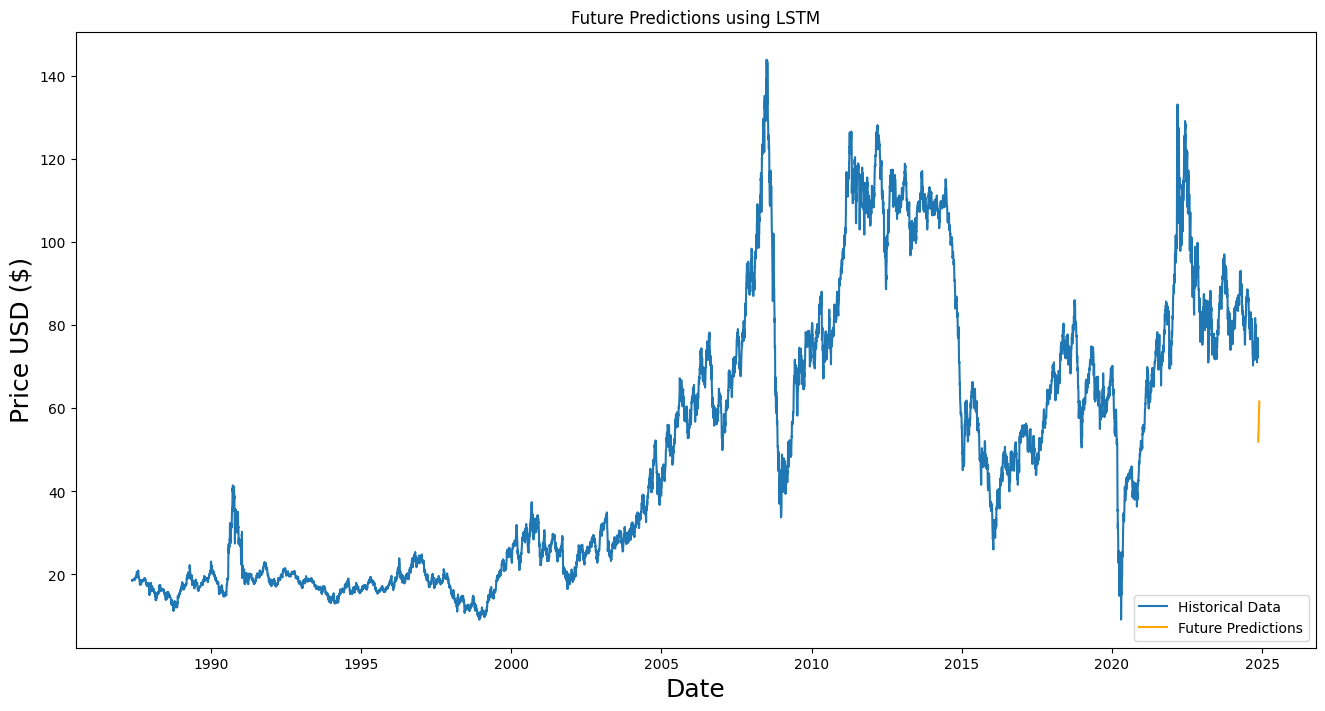

            Predictions
Date                   
2024-11-13    51.985714
2024-11-14    53.030636
2024-11-15    54.046810
2024-11-18    55.070099
2024-11-19    56.106525
2024-11-20    57.163414
2024-11-21    58.244129
2024-11-22    59.350426
2024-11-25    60.483162
2024-11-26    61.642914


In [ ]:
# Prediksi Harga Minyak Mentah (USD Dollar)
future_steps = 10  # 10 Hari ke Depan
current_sequence = scaled_data[training_data_len - lookback:training_data_len, 0]
predictions_future = []

for _ in range(future_steps):
    input_sequence = np.reshape(current_sequence, (1, lookback, 1))
    next_step_scaled = model.predict(input_sequence)
    next_step = scaler.inverse_transform(next_step_scaled)
    predictions_future.append(next_step[0][0])

    current_sequence = np.append(current_sequence[1:], next_step_scaled)

# Generate Tanggal yang akan Datang
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='B')[1:]  # Business days

# Membuat Dataframe untuk Prediksi Harga yang akan datang
future_df = pd.DataFrame({'Date': future_dates, 'Predictions': predictions_future})
future_df.set_index('Date', inplace=True)

# Mmebuat Plot Hasil Prediksi Harga Minyak Mentah (USD Dollar)
plt.figure(figsize=(16, 8))
plt.title('Future Predictions using LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.plot(df.index, df['Europe Brent Spot Price FOB (Dollars per Barrel)'], label='Historical Data')
plt.plot(future_df.index, future_df['Predictions'], label='Future Predictions', color='orange')
plt.legend(loc='lower right')
plt.show()

# Print predictions with dates
print(future_df)